<a href="https://colab.research.google.com/github/PraveenKumar-06/Captcha-Project-AIET-Group-6/blob/master/CAPTCHA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Packages required to import

In [0]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from google.colab.patches import cv2_imshow

###To Find a point is the rectangle


In [0]:
def rectContains(rect,pt):
    bo = rect[0] < pt[0] < rect[0]+rect[2] and rect[1] < pt[1] < rect[1]+rect[3]
    return bo

##Image reading and preprocessing for further steps

In [0]:

#scanning the image from the local disk
img = cv2.imread('manynum.png')

#resize the image
img = cv2.resize(img, (0,0), fx=5, fy=5)

#converting the image to gray scale
imgray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
imd = cv2.GaussianBlur(imgray, (5,5), 0)
#using the threshold to clear some noise in the given image, insert the values in range 90-200 for better results
ret, thresh = cv2.threshold(imd, 135, 255, cv2.THRESH_BINARY)

_,contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#using the contour values to make the rectangele the around the contours.
rects = [cv2.boundingRect(ctr) for ctr in contours]
#rects = rects[:len(rects)-1]
nrects=[]
for rect in rects:
    if rect[0]!=0 and rect[1]!=0:
        nrects.append(rect)
rects=nrects
rem=[]
print()
#finding/identifing inner Rectangles whic are present in the letters and digits like 0,4,6,8,9,A,B,D,O,P,Q,R,... 
for i in range(len(rects)):
    for rect in rects:
        r=[rect[0],rect[1]]
        tp=(rect[0],rect[1],rect[2],rect[3])
        vc=rectContains(rects[i],r)
        if(vc==True):
            print("Inner Rectangle found to remove from the list:", tp)
            rem.append(tp)

#removing inner Rectangles from the rectangles we founnd this is removing the inner rectangles only it does not actually identify the 
for i in rem:
    if i in rects:
        rects.remove(i)
        
print("The no of objects founnd are :",len(rects))
rects=sorted(rects, key=lambda element: (element[0], element[1]))
print(rects)
print("The coordinate and the length,height of the rectangle are :")
for i,rect in enumerate(rects):
    cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 0, 255), 2)    
    print(rect)

##Croping ,padding ,resizing to 28x28

In [0]:

crop=[]
for j,i in enumerate(rects):
    crp = imgray[i[1]:i[1]+i[3] , i[0] : i[0]+i[2]]
    re=cv2.resize(crp,(16,16))
    pd=cv2.copyMakeBorder(re,6,6,6,6,cv2.BORDER_CONSTANT,value=[255,255,255])
    crop.append(pd)
    #cv2_imshow(crop[j])
    #print()
crop[0].shape

(28, 28)

##Drawing along with the edge of the shape,rectangle box plot. and Image Visuilization


In [0]:
#This is only for visualization purpose, better use local system for visualization
cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
#cv2.drawContours(imgray, contours, -1, (255, 0, 255), 1)
#cv2_imshow(img)
#cv2_imshow( imgray)


##MNIST model testing

In [0]:
mniststr=[]
model = pickle.load(open('MNIST.sav', 'rb'))
for t,i in enumerate(crop):
  imag = i
  imag = cv2.bitwise_not(imag)
  imag = cv2.resize(imag, (28, 28))
  imag = np.array(imag)
  imag = imag.astype('float32')/255
  pred = model.predict(imag.reshape(1,28,28,1))[0]
  prob = np.max(pred)
  pred = np.argmax(pred)
  cv2_imshow(i)
  mniststr.append([pred,prob])
print(mniststr)

##EMNIST dataset testing

For assigning the 26 classes 

In [0]:
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [0]:
emniststr=[]
model = pickle.load(open('EMNIST.sav', 'rb')) 
for u,o in enumerate(crop):
  #loading the saved model
  ig = o 
  #invert Colour
  ig = cv2.bitwise_not(ig) 
  #resizing
  ig = cv2.resize(ig, (28, 28)) 
  #convert to Array
  ig = np.array(ig) 
  #normalizing pixel values between 0-1
  ig = ig.astype('float32')/255 
  #predicting a new image
  pred = model.predict(ig.reshape(1,28,28,1))[0] 
  #propabality of the image to be of class
  prob = np.max(pred) 
  #prediction of class
  pred = np.argmax(pred) 
  #cv2_imshow(o)
  emniststr.append([alphabet[pred],prob])
print(emniststr)

[['J', 0.49457768], ['B', 0.44021916], ['S', 0.83489287], ['T', 0.6007584], ['E', 0.49650317], ['T', 0.6108387], ['S', 0.67294866], ['Z', 0.45010892], ['S', 0.80886316], ['S', 0.68376166], ['I', 0.72913903], ['O', 0.9717136], ['Z', 0.5440197], ['S', 0.6516193], ['T', 0.83078605], ['O', 0.99058795], ['S', 0.995808], ['A', 0.73308164], ['O', 0.9849199], ['T', 0.5941962], ['S', 0.99620974], ['E', 0.35792986], ['S', 0.58982664], ['S', 0.64331436], ['S', 0.8644418], ['S', 0.6460025], ['S', 0.91897017], ['S', 0.5369224], ['Z', 0.9992774], ['I', 0.60920614], ['S', 0.99489635], ['S', 0.936391], ['S', 0.9923867], ['E', 0.42127746], ['T', 0.7735903], ['S', 0.66701055], ['O', 0.9878193], ['E', 0.49958622], ['S', 0.74116296], ['T', 0.5564355], ['B', 0.32783982], ['S', 0.7933995], ['Z', 0.7314437], ['T', 0.5839351], ['S', 0.7854811], ['O', 0.99195135], ['A', 0.56315225], ['S', 0.995199], ['O', 0.9858686], ['T', 0.68369925], ['S', 0.98785096], ['E', 0.41113275], ['S', 0.6154631], ['S', 0.59897727], 

[[3, 0.9999938], [8, 0.97105926], [9, 0.9999989], [7, 0.99562424], [8, 0.55600935], [7, 0.98205984], [8, 0.93594307], [7, 0.5085117], [3, 0.9999976], [8, 0.5561756], [1, 0.6105469], [0, 0.9992549], [1, 0.4871123], [9, 0.99999976], [7, 0.94812113], [0, 0.9860502], [5, 0.53807354], [4, 0.9431915], [0, 0.99715984], [7, 0.97112143], [5, 0.8943401], [9, 0.51440537], [6, 0.6835203], [9, 0.9999974], [3, 0.99995446], [9, 0.9999994], [3, 0.99998796], [8, 0.39402157], [2, 0.9999484], [2, 0.69178367], [9, 0.51602733], [3, 0.9999747], [9, 0.8094612], [8, 0.6560332], [7, 0.9972149], [9, 0.999997], [0, 0.99927264], [8, 0.9339006], [5, 0.74808913], [7, 0.93363297], [9, 0.94362825], [6, 0.41493252], [1, 0.60265535], [7, 0.70793915], [9, 0.9999994], [0, 0.99621814], [4, 0.9837789], [5, 0.93318874], [0, 0.9997663], [7, 0.9828734], [5, 0.49023792], [8, 0.67056686], [3, 0.99996924], [9, 0.999987], [8, 0.901843], [5, 0.5911969], [9, 0.87181884], [3, 0.9999993], [5, 0.7258049], [5, 0.49771434], [3, 0.999992

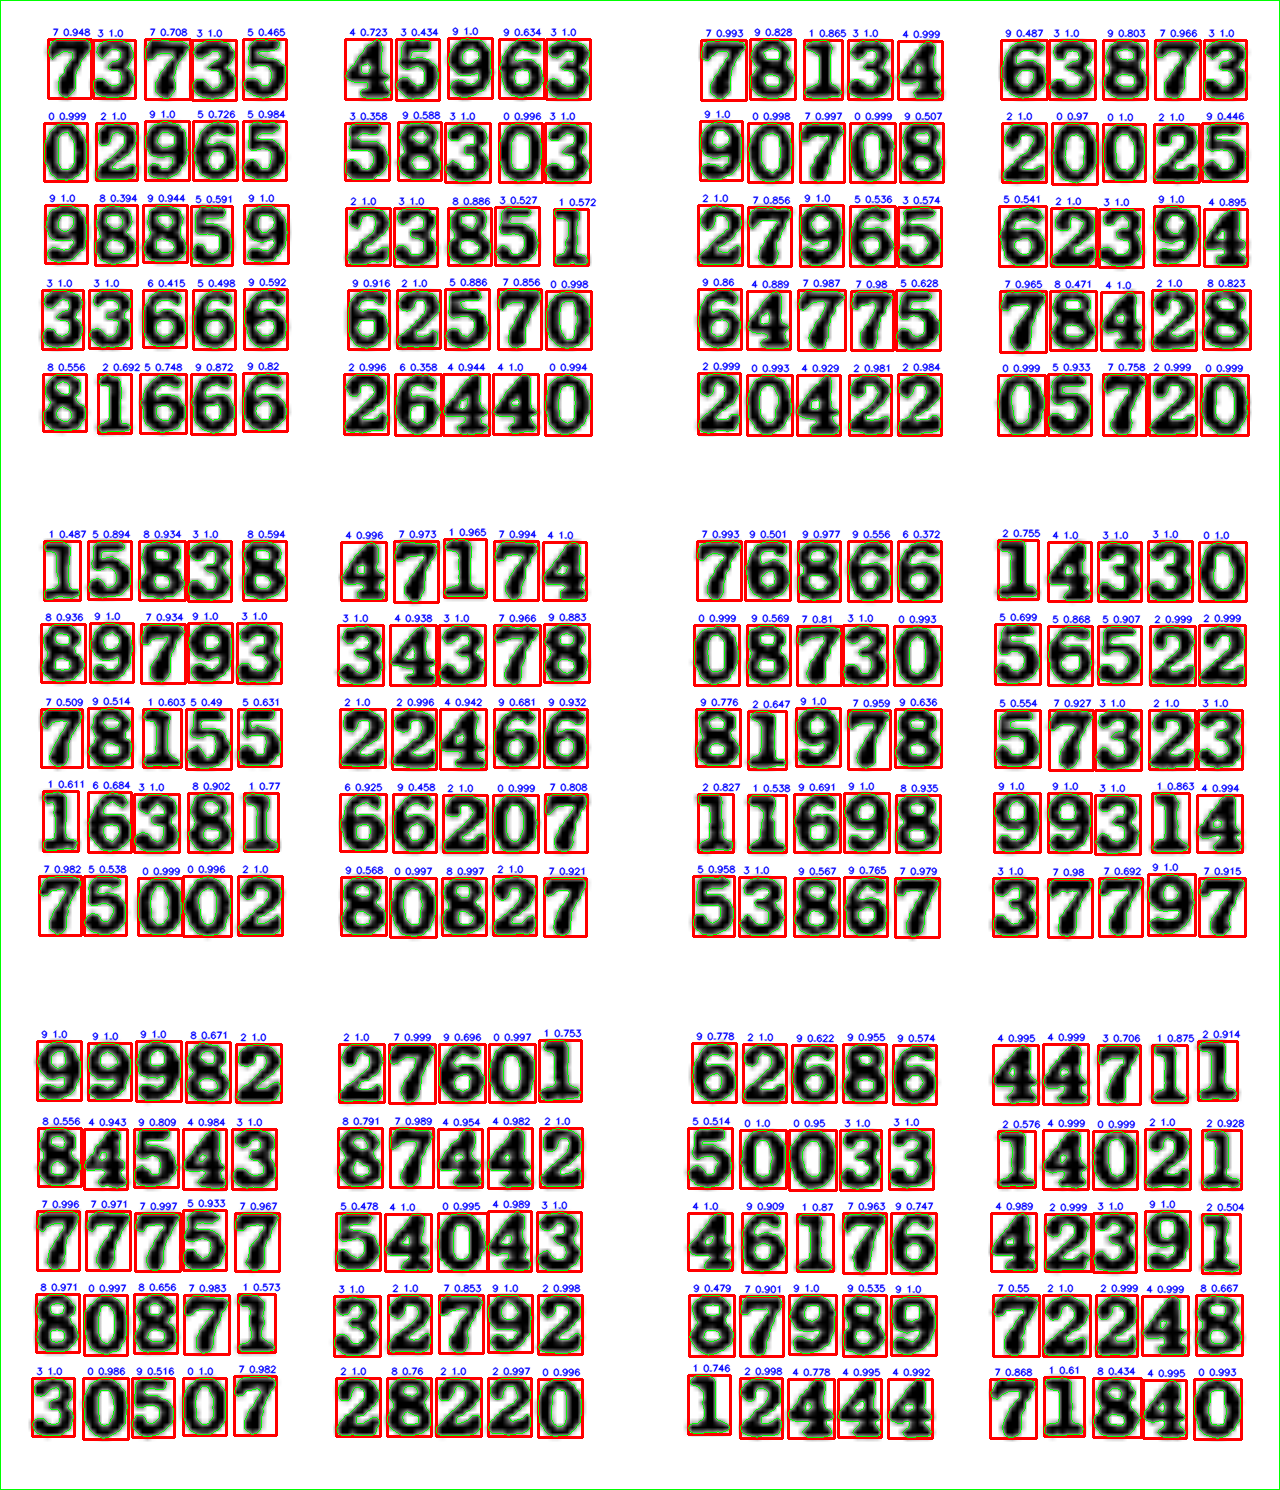

In [0]:
cap=[]
font = cv2.FONT_HERSHEY_SIMPLEX
# We have to compare the EMNIST and MNIST Datasets and give the prediction which results in higher probability
for j,rect in enumerate(rects):
  #if emniststr[j][1] > mniststr[j][1]:
    #cap.append(emniststr[j])
  #else:
  cap.append(mniststr[j])
  cv2.putText(img, str(cap[j][0])+" "+str(round(cap[j][1],3)), (rect[0]+4,rect[1]-4), font, 0.3, (255,0,0), 1, cv2.LINE_AA)

print(cap)
cv2_imshow(img)